It is desired to design a one-layer NN with two inputs and two outputs that classifies the following 10 points into 4 groups as shown:
- Group 1: (0.1, 1.2), (0.7, 1.8), (0.8, 1.6)
- Group 2: (0.8, 0.6), (1.0, 0.8)
- Group 3: (0.3, 0.5), (0.0, 0.2), (−0.3, 0.8)
- Group 4: (−0.5, −1.5), (−1.5, −1.3)

To cast this problem in terms of a tractable NN design task, represent the four groups respectively using the binary codes (1, 0), (0, 0), (1, 1), and (0, 1). Define the input matrix as:

```py
X = [[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
       [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]]

y = [[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]
```
Use sigmoid activation function, design an NN and train the network using backpropagation algorithm (do not use any pre-existing package - write your own backpropagation algorithm).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from micrograd.comp_graph import draw_dot
from micrograd.nn import MLP

%matplotlib inline

In [2]:
def T(x:list[list]):
    """Transpose a matrix represented as a list of lists."""
    tx = []
    for jcol in range(len(x[0])):
        row = []
        for irow in range(len(x)):
            row.append(x[irow][jcol])
        tx.append(row)
    return tx

def shape(x):
    return (len(x), len(x[0])) if x else (0, 0)

In [3]:
X_T = [[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
       [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]]

y_T = [[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]

X = T(X_T)
y = T(y_T)

# Convert y to a single class label for visualization purposes
groups = [''.join(list(map(str, yrow))) for yrow in y]  # 4 classes
groups = list(map(int, groups))
hash = {v:k for k, v in enumerate(set(groups))}  # {int: class} where int is the concatenated output of 2 outputs (00, 01, 10, 11)
hash_reversed = {k:v for v, k in hash.items()}
groups = [hash[g] for g in groups]

print("X shape:", shape(X))
print("y shape:", shape(y))
print(f"{groups=}")

X shape: (10, 2)
y shape: (10, 2)
groups=[2, 2, 2, 0, 0, 3, 3, 3, 1, 1]


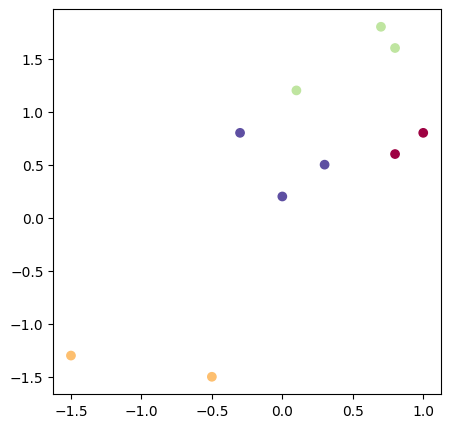

In [4]:
# visualize in 2D
plt.figure(figsize=(5,5))
xp = np.array(X)
plt.scatter(xp[:,0], xp[:,1], c=groups, cmap=plt.cm.Spectral)
plt.show()

In [5]:
# initialize a model
model = MLP(2, [12, 2], nonlin='sigmoid')
print("number of parameters", len(model.parameters()))
print(model)

number of parameters 62
MLP of [
Layer of [sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2), sigmoidNeuron(in:2)],
Layer of [linearNeuron(in:12), linearNeuron(in:12)]
]


In [6]:
# loss function
threshold = 0.5
def loss():
    """Forward pass, then return loss and accuracy."""
    # forward pass
    # call the model on the inputs. Note the model is being called and passed each row of X (with 2 features)
    output = list(map(model, X))
    
    # calculate the loss
    losses = [(output[i][0] - y[i][0])**2 + (output[i][1] - y[i][1])**2 for i in range(len(y))]
    data_loss = sum(losses) * (1.0 / len(losses))    

    # calculate accuracy
    correct = 0
    total = len(y)
    
    for irow in range(total):
        pred_class = ''.join([str(int(output[irow][0].data > threshold)), 
                              str(int(output[irow][1].data > threshold))])
        true_class = ''.join([str(y[irow][0]), str(y[irow][1])])

        correct += 1 if pred_class == true_class else 0
    
    return data_loss, correct/total

total_loss, acc = loss()
print(total_loss, f'| accuracy={acc}')

Value(data=1.3561245858180826, grad=0) | accuracy=0.2


epoch 0 | loss=0.2281 | accuracy=70.0
epoch 1 | loss=0.2229 | accuracy=70.0
epoch 2 | loss=0.2188 | accuracy=70.0
epoch 3 | loss=0.2155 | accuracy=70.0
epoch 4 | loss=0.2129 | accuracy=70.0
epoch 5 | loss=0.2107 | accuracy=70.0
epoch 6 | loss=0.2090 | accuracy=70.0
epoch 7 | loss=0.2075 | accuracy=70.0
epoch 8 | loss=0.2062 | accuracy=80.0
epoch 9 | loss=0.2051 | accuracy=80.0
epoch 10 | loss=0.2042 | accuracy=80.0
epoch 11 | loss=0.2033 | accuracy=80.0
epoch 12 | loss=0.2025 | accuracy=80.0
epoch 13 | loss=0.2018 | accuracy=80.0
epoch 14 | loss=0.2011 | accuracy=80.0
epoch 15 | loss=0.2005 | accuracy=80.0
epoch 16 | loss=0.1999 | accuracy=80.0
epoch 17 | loss=0.1993 | accuracy=80.0
epoch 18 | loss=0.1987 | accuracy=80.0
epoch 19 | loss=0.1982 | accuracy=80.0
epoch 20 | loss=0.1976 | accuracy=80.0
epoch 21 | loss=0.1971 | accuracy=80.0
epoch 22 | loss=0.1966 | accuracy=80.0
epoch 23 | loss=0.1961 | accuracy=80.0
epoch 24 | loss=0.1956 | accuracy=80.0
epoch 25 | loss=0.1951 | accuracy=8

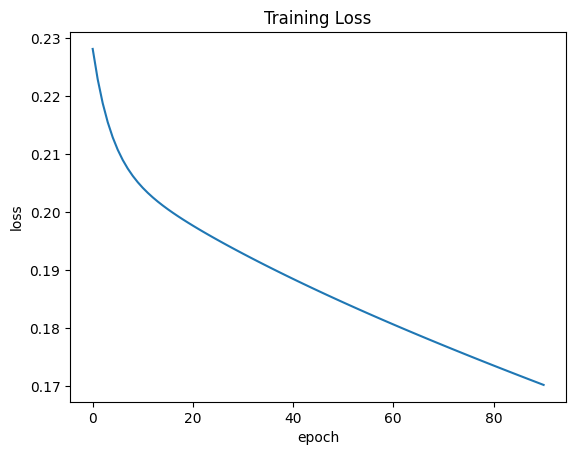

In [11]:
# training loop
epochs = 90
lr = 0.1
tr_loss = []

for epoch in range(epochs+1):
    # calculate forward pass, loss, accuracy
    total_loss, acc = loss()
    tr_loss.append(total_loss.data)
    print(f'epoch {epoch} | loss={total_loss.data:.4f} | accuracy={acc*100:.1f}')
    
    if epoch == epochs:
        break

    # backpropagation
    model.zero_grad()
    total_loss.backward()
    
    # update weights
    for p in model.parameters():
        p.data -= p.grad * lr
    
# visualize loss
plt.plot(tr_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training Loss')
# plt.savefig('images/loss_q1.svg', dpi=300)
plt.show()


Interestingly, increasing the neorons in one hidden layer, increase the acc after 100 learning epochs, while increasing the hidden layers to 2 or more limits the learning acc to around 0.3

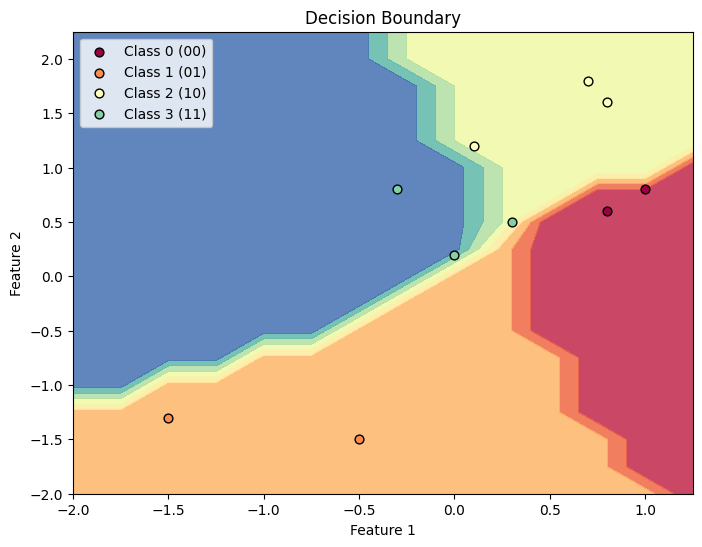

In [12]:
# visualization of decision boundary
h = 0.25  # the precision of the mesh grid
padding = 0.5  # padding for the plot

xp = np.array(X)  # for easier slicing
x_min, x_max = xp[:, 0].min() - padding, xp[:, 0].max() + padding
y_min, y_max = xp[:, 1].min() - padding, xp[:, 1].max() + padding

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Xmesh = np.c_[xx.ravel(), yy.ravel()]  # create [[x,y],...] from xx and yy
preds = list(map(model, Xmesh))

# Convert predictions to class labels
Z = []
for irow in preds:
    # each irow have the output of 2 neurons
    pred_class = int(''.join([str(int(irow[0].data > threshold)), 
                              str(int(irow[1].data > threshold))]))
    Z.append(hash[pred_class])

Z = np.array(Z)
Z = Z.reshape(xx.shape)

# legend_labels = [f'Class {i} ({bin(hash_reversed[i])[2:].zfill(2)})' for i in range(len(hash))]
legend_labels = []
for i in range(len(hash)):
    tt = hash_reversed[i]
    if tt == 0 or tt == 1:
        tt = f"0{str(tt)}"
    legend_labels.append(f'Class {i} ({tt})')

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.85)
# plt.scatter(xp[:, 0], xp[:, 1], c=groups, cmap=plt.cm.Spectral, s=40, edgecolors='k')  # can't add legends with this
for i in range(len(hash)):  # to have the classes
    mask = np.array(groups) == i
    plt.scatter(xp[mask, 0], xp[mask, 1], 
               c=[plt.cm.Spectral(i/float(len(hash)))], 
               label=legend_labels[i],
               s=40, edgecolors='k')
plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.savefig('images/decision_boundary_q1_100epochs.svg', dpi=300)
plt.show()

In [13]:
# visualize the computational graph
dot = draw_dot(total_loss)
# dot.render('images/gout_q1') # saving the graph as a svg file
dot